In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime

In [5]:
amazon = yf.Ticker('AMZN')

In [8]:
amazon_history = amazon.history(period="max")

In [9]:
amazon_df = pd.DataFrame(amazon_history)

In [10]:
amazon_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-14 00:00:00-04:00,177.690002,179.529999,176.470001,178.750000,43705800,0.0,0.0
2024-03-15 00:00:00-04:00,176.639999,177.929993,173.899994,174.419998,72115500,0.0,0.0
2024-03-18 00:00:00-04:00,175.800003,176.690002,174.279999,174.479996,31250700,0.0,0.0
2024-03-19 00:00:00-04:00,174.220001,176.089996,173.520004,175.899994,26880900,0.0,0.0
2024-03-20 00:00:00-04:00,176.139999,178.529999,174.639999,178.149994,29867200,0.0,0.0


Simple Moving Average

In [11]:
amazon_df['Open:10days']=amazon_df['Open'].rolling(10).mean()

In [12]:
amazon_df['Open:20days']=amazon_df['Open'].rolling(20).mean()
amazon_df['Open:30days']=amazon_df['Open'].rolling(30).mean()
amazon_df['Open:40days']=amazon_df['Open'].rolling(40).mean()

<Axes: xlabel='Date'>

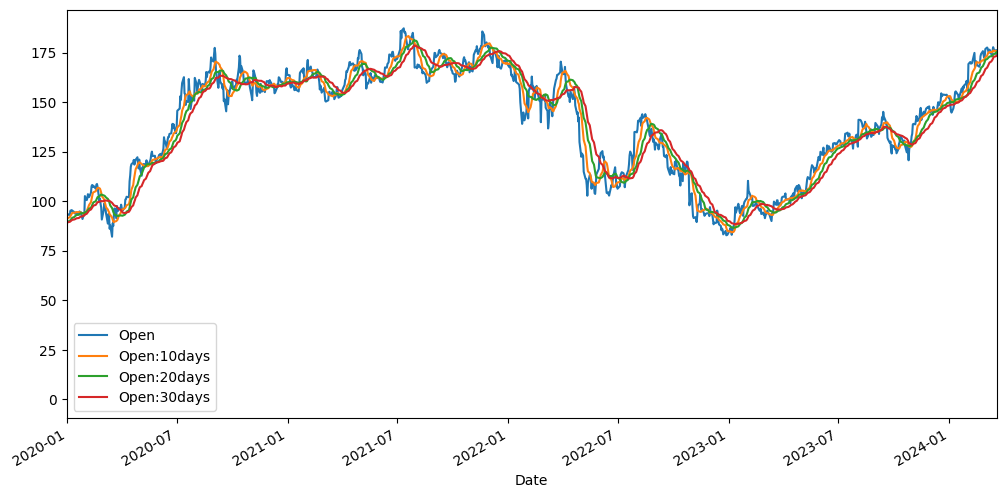

In [26]:
amazon_df[['Open','Open:10days','Open:20days','Open:30days']].plot(xlim=['2020-01-01','2024-03-20'],figsize=(12,6))

In [ ]:
Cumulative Moving Frequency

<Axes: xlabel='Date'>

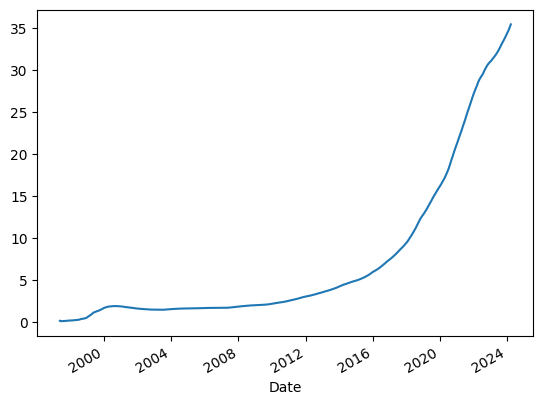

In [28]:
amazon_df['Open'].expanding().mean().plot()

In [30]:
amazon_df.drop('Open:30days',axis=1,inplace= True)

In [33]:
amazon_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open:10days,Open:20days,Open:40days
Date,,,,,,,,,,
1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0,NaN,NaN,NaN
1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0,NaN,NaN,NaN
1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0,NaN,NaN,NaN
1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0,NaN,NaN,NaN
1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0,NaN,NaN,NaN


Exponential Moving Average Funtction to use "ema"

In [40]:
amazon_df['Open:ema']=amazon_df['Open'].ewm(alpha=0.3, adjust=False).mean()

<Axes: xlabel='Date'>

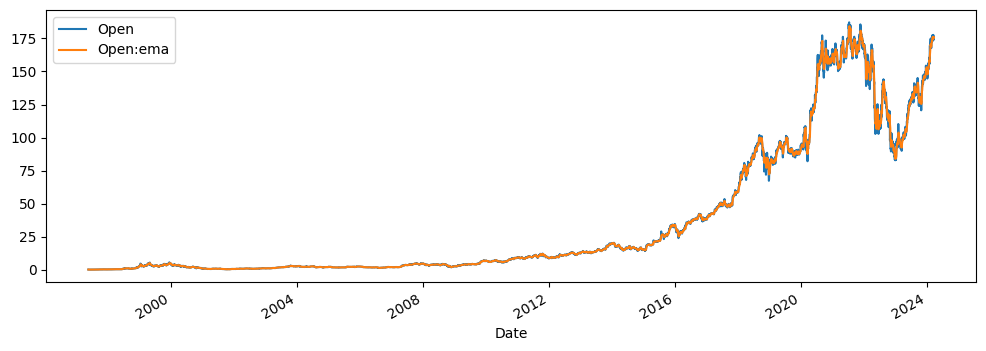

In [46]:
amazon_df[['Open','Open:ema']].plot(figsize=(12,4))

In [47]:
amazon_df['Open:ema']=amazon_df['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

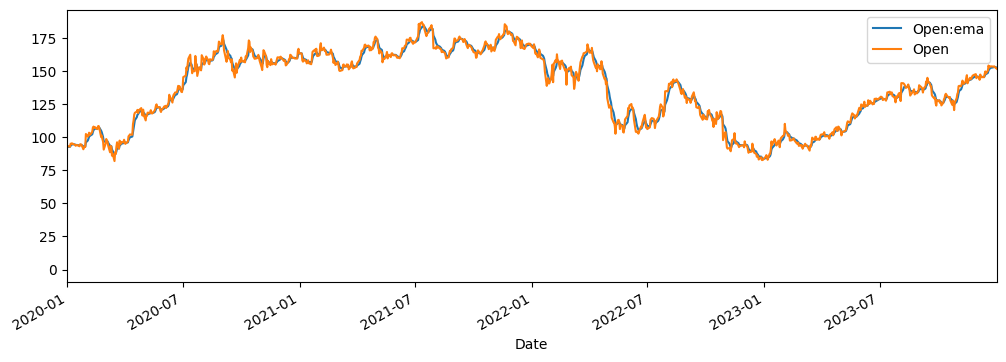

In [49]:
amazon_df[['Open:ema','Open']].plot(xlim=['2020-01-01','2024-01-01'],figsize=(12,4))